# Panoptic Segmentation with MaXDeepLab

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Panoptic Segmentation with MaXDeepLab" data-toc-modified-id="Panoptic Segmentation with MaXDeepLab-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Panoptic Segmentation with MaXDeepLab</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></ul><ul class="toc-item"><li><span><a href="#MaXDeepLab" data-toc-modified-id="MaXDeepLab-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>MaXDeepLab</a></span></li><li><span><a href="#Implementation-in-arcgis.learn" data-toc-modified-id="Implementation-in-arcgis.learn-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Implementation in <code>arcgis.learn</code></a></span></li><li><span><a href="#References" data-toc-modified-id="References-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>References</a></span></li></ul></li></ul></li></div>

## Introduction

Panoptic segmentation [1] is a computer vision task that creates a complete segmentation of an image and labels each pixel with a class label, including both "stuff" classes (e.g., sky, road, grass) and "thing" classes (e.g., person, car, tree). In other words, panoptic segmentation aims to perform both instance segmentation (segmenting each object instance as a separate entity) and semantic segmentation (labeling each pixel with a class label) in a single model.

The goal of panoptic segmentation is to provide a more complete and accurate representation of an image by not only detecting and labeling individual objects, but also understanding the relationships between objects and the scene as a whole. This can be useful for a variety of applications, such as remote sensing, autonomous driving, robotics, and augmented reality.

Panoptic segmentation models are typically trained on large datasets of annotated images and use techniques from deep learning, such as convolutional neural networks (CNNs), and recently transformers, to learn to segment images. The performance of panoptic segmentation algorithms is typically evaluated using the panoptic quality (PQ) metric, which measures the overall quality of the predicted segmentation in terms of its completeness and consistency.

<figure>    
   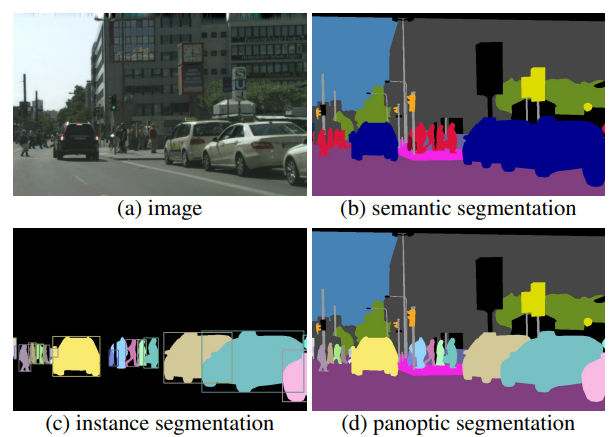
    <br>
    <center>
    <figcaption>Figure 1: Different Segmentation tasks [1]</figcaption>
    </center>
</figure>

## MaXDeepLab

MaXDeepLab is the "first end-to-end model for panoptic segmentation" that predicts a set of non-overlapping masks and their classes directly [2]. While earlier panoptic segmentation models use hand-coded priors, such as anchors for objects, and other techniques, such as instance and semantic segmentation merging [3], MaXDeepLab combines these multiple surrogate tasks and provides a unified model. MaXDeepLab architecture includes a dual-path transformer, a stacked decoder, and two output heads that predict the masks and the classes.

<figure>
<img src='
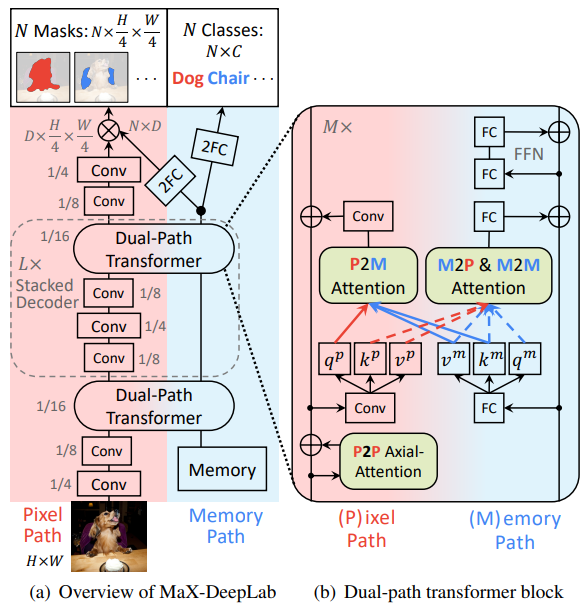
'>
<br>
<center>
<figcaption>Figure 2: MaXDeepLab architecture [2]</figcaption>
</center>
</figure>

A transformer [4] is a type of neural network architecture. It is primarily used for natural language processing (NLP) tasks, such as language translations, but is increasingly making its way into computer vision. The main innovation of the transformer architecture is the use of self-attention mechanisms that allow the model to weight input features differently at different positions in the input sequence. This helps the model to understand long-range dependencies in the input data, as the self-attention mechanism allows the model to attend to relevant features at any position in the input sequence.

MaXDeepLab also uses the axial attention block from the Axial-DeepLab [5] model for its pixel-to-pixel self attention blocks. Axial attention blocks use two 1D attentions along height and width, sequentially. This creates position sensitive attentions, while keeping the model computationally less expensive. This is in contrast to the 2D attentions that have become common with image inputs and that introduce either computational complexity or localization constraints. Axial attention efficiently attends to a large receptive field. The MaX-Deeplab name is derived from extending the Axial-Deeplab with a <b>Ma</b>sk <b>X</b>former [2].

<figure>
<img src='
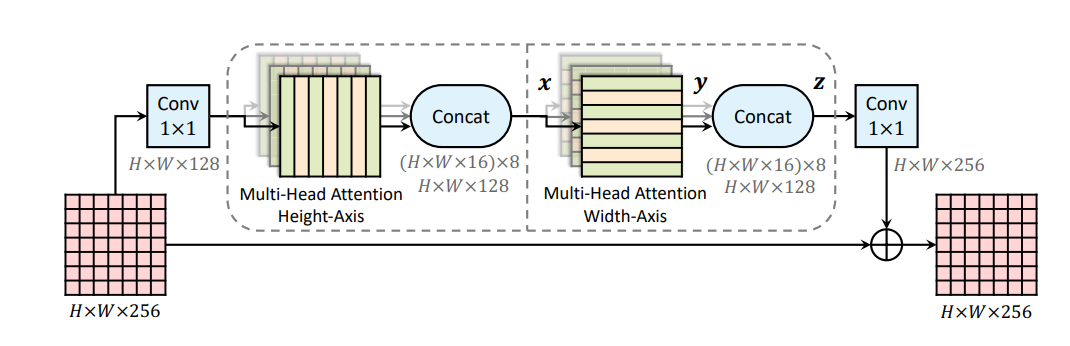
'>
<br>
<center>
<figcaption>Figure 3: An axial-attention block from Axial-DeepLab [5]</figcaption>
</center>
</figure>

MaXDeepLab employs CNNs along with transformers in a novel architecture called the dual-path transformer block. The CNNs and the transformer are integrated in a dual-path fashion, allowing bi-directional communication amongst the pixels and the global memory paths. This enables the CNNs to read and write from the global memory at any layer [2]. This contributes to a better performing model.

Another important characteristic of MaXDeepLab is the use of a loss function that is inspired by Panoptic Quality (PQ), the evaluation metric for panoptic segmentation. Panoptic quality is defined as the multiplication of recognition quality and segmentation quality [2]. Recognition quality represents the similarity between the classes and segmentation quality represents the similarity between the masks.

## Implementation in `arcgis.learn`

You can create a MaXDeepLab model in `arcgis.learn` using a single line of code.

```
model = MaXDeepLab(data)
```

where `data` is the databunch prepared for training using the `prepare_data` method in the earlier steps.

For more information about the API, please go to the [API reference](https://developers.arcgis.com/python/api-reference/arcgis.learn.toc.html#maxdeeplab).

## References

- [1] Alexander Kirillov, Kaiming He, Ross Girshick, Carsten Rother, and Piotr Dollár: “Panoptic Segmentation”, 2019; <a href='https://arxiv.org/abs/1801.00868'>arXiv:1801.00868</a>
- [2] Huiyu Wang, Yukun Zhu, Hartwig Adam, Alan Yuille, and Liang-Chieh Chen: “MaX-DeepLab: End-to-End Panoptic Segmentation with Mask Transformers”, 2021; <a href='https://arxiv.org/abs/2012.00759'>arXiv:2012.00759</a>
- [3] Alexander Kirillov, Ross Girshick, Kaiming He, and Piotr Dollár: “Panoptic Feature Pyramid Networks”, 2019; <a href='https://arxiv.org/abs/1901.02446'>arXiv:1901.02446</a>

- [4] Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, and Illia Polosukhin: “Attention Is All You Need”, 2017; <a href='https://arxiv.org/abs/1706.03762'>arXiv:1706.03762</a>
- [5] Huiyu Wang, Yukun Zhu, Bradley Green, Hartwig Adam, Alan Yuille, and Liang-Chieh Chen: “Axial-DeepLab: Stand-Alone Axial-Attention for Panoptic Segmentation”, 2020; <a href='https://arxiv.org/abs/2003.07853'>arXiv:2003.07853</a>